# Predicting redshifts with partial data with regression

Median difference: 0.017


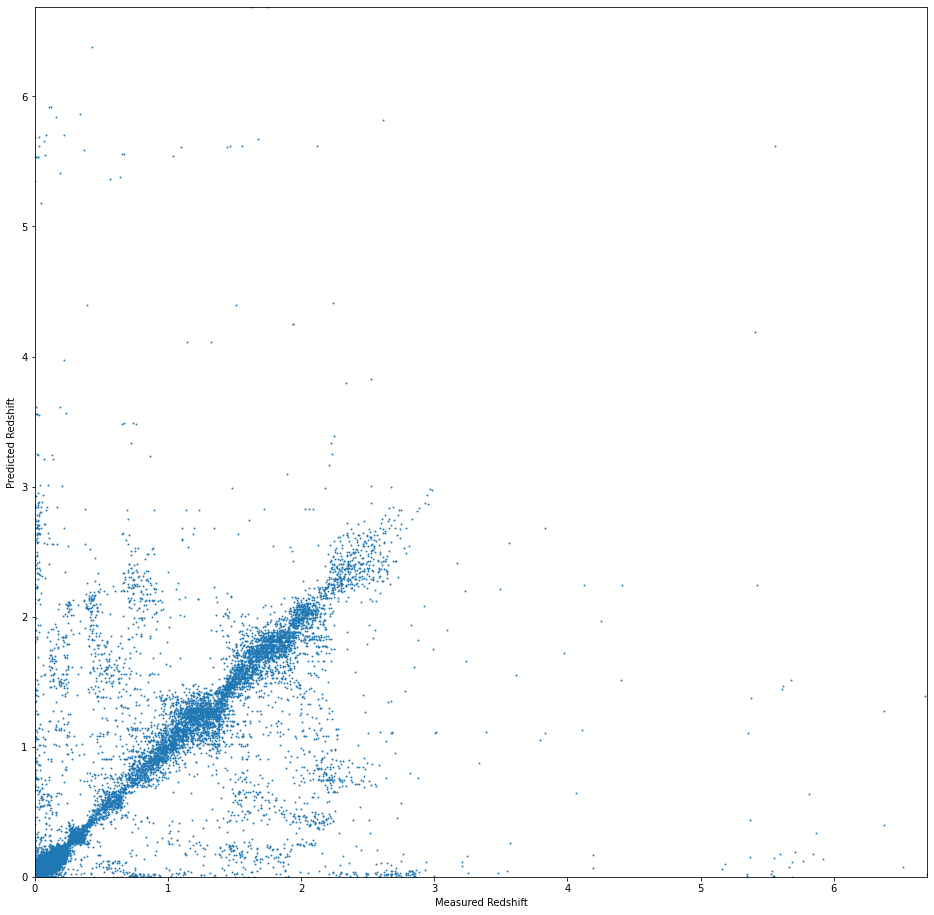

In [4]:
import requests
import io
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

def get_features_targets(data):
  features = np.stack((
     (data['u'] - data['g']),
     (data['g'] - data['r']),
     (data['r'] - data['i']),
     (data['i'] - data['z']) ),
    axis=-1)  
  return features, data['redshift']

def median_diff(predicted, actual):
  return np.median(np.abs(predicted[:] - actual[:]));

# complete this function
def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for i, (train_indices, test_indices) in enumerate(kf.split(features)):
    # split the data into training and testing
     
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]
    
    model.fit(train_features, train_targets)
    predictions = model.predict(test_features)
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions    


if __name__ == "__main__":

  response = requests.get('https://github.com/goldborough/astro-notebook/master/datasets/sdss_galaxy_colors.npy')
  response.raise_for_status()
  data = np.load()

  data = np.load(io.BytesIO(response.content))
  features, targets = get_features_targets(data)

  # initialize model
  dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
  predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  # plot the results to see how well our model looks
  plt.rcParams["figure.figsize"] = (16,16)

  plt.scatter(targets, predictions, s=0.8)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()
